# Proyecto energía analisis bivariado

## Integrantes

- Enrique Laguna Diaz
- Hector Aaron Ramirez Obregon
- Humberto Peñuelas Almeida

## Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'


## Importar datos del nuevo csv con datos limpiados

In [2]:
path = "Clean_Energy.csv"
energia_df = pd.read_csv(path,sep=",",encoding="utf-8")

In [3]:
energia_df

,register_id,YEAR,MONTH,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION
0,0,2001,1,AK,Total Electric Power Industry,Coal,46903.0
1,1,2001,1,AK,Total Electric Power Industry,Petroleum,71085.0
2,2,2001,1,AK,Total Electric Power Industry,Natural Gas,367521.0
3,3,2001,1,AK,Total Electric Power Industry,Hydroelectric Conventional,104549.0
4,4,2001,1,AK,Total Electric Power Industry,Wind,87.0
...,...,...,...,...,...,...,...
496769,10581,2022,5,WY,"Electric Generators, Electric Utilities",Coal,2071403.0
496770,10582,2022,5,WY,"Electric Generators, Electric Utilities",Hydroelectric Conventional,96790.0
496771,10583,2022,5,WY,"Electric Generators, Electric Utilities",Natural Gas,91570.0
496772,10584,2022,5,WY,"Electric Generators, Electric Utilities",Petroleum,1812.0


array(['Total Electric Power Industry',
       'Electric Generators, Electric Utilities',
       'Combined Heat and Power, Electric Power',
       'Combined Heat and Power, Commercial Power',
       'Combined Heat and Power, Industrial Power',
       'Electric Generators, Independent Power Producers'], dtype=object)

numpy.ndarray

LabelEncoder()

['Combined Heat and Power, Commercial Power',
 'Combined Heat and Power, Electric Power',
 'Combined Heat and Power, Industrial Power',
 'Electric Generators, Electric Utilities',
 'Electric Generators, Independent Power Producers',
 'Total Electric Power Industry']

array(['Coal', 'Petroleum', 'Natural Gas', 'Hydroelectric Conventional',
       'Wind', 'Total', 'Other Gases', 'Nuclear',
       'Wood and Wood Derived Fuels', 'Other Biomass', 'Other',
       'Solar Thermal and Photovoltaic', 'Pumped Storage', 'Geothermal'],
      dtype=object)

<AxesSubplot:xlabel='y'>

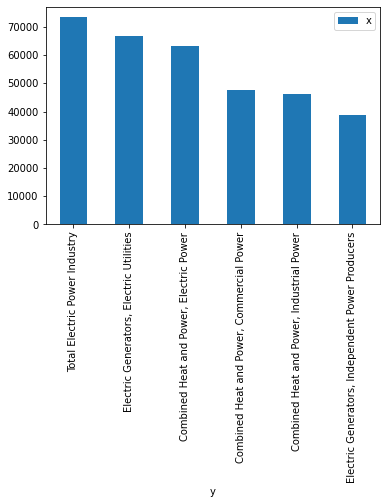

In [4]:
producer_type = energia_df['TYPE OF PRODUCER'].unique()
producer_type
type(producer_type)
TEPI = energia_df.loc[energia_df['TYPE OF PRODUCER'] == 'Total Electric Power Industry']

# tranformar variables no numericas a numericas
le = preprocessing.LabelEncoder()
le.fit(producer_type)

list(le.classes_)

numeric_producer_type = le.transform(producer_type)
#np.sort(numeric_producer_type)

energy_sr = energia_df['ENERGY SOURCE'].unique()
energy_sr

count_producers = energia_df['ENERGY SOURCE'].value_counts()
num_producers = count_producers.values
#np.sort(num_producers)

df = pd.DataFrame({'x':num_producers[:6], 'y': producer_type[:6]})
#df.sort_values(by=['x', 'y'])
df.plot('y','x', kind='bar')

In [5]:
energyYear2020 = energia_df.loc[(energia_df['ENERGY SOURCE'] == 'Coal') &(energia_df['YEAR'] == 2001)]

energyYear2020[['GENERATION']].sum()
#print(energyYear2020)

energy_sources = ['Coal', 'Petroleum', 'Natural Gas', 'Hydroelectric Conventional',
       'Wind', 'Total', 'Other Gases', 'Nuclear',
       'Wood and Wood Derived Fuels', 'Other Biomass', 'Other',
       'Solar Thermal and Photovoltaic', 'Pumped Storage', 'Geothermal']


years = [2001+i for i in range(22)]
#years

acumulados = pd.DataFrame(columns = ['Año','Fuente','Total'])

# para cado año se van a calcular la producion total de cada fuente de energía
for i in years:

       for j in energy_sources:
              # se crea un data frame temporal filtrado por fuente de energia y año
              # a nuestro data frame de acumulados se le va a agregar una fila que contenga  añ, fuente, acumulado
              temp = energia_df.loc[(energia_df['ENERGY SOURCE'] == j) &(energia_df['YEAR'] == i)]
              acumulados.loc[len(acumulados.index)] = [i,j,temp['GENERATION'].sum()]

acumulados




GENERATION    7.615824e+09
dtype: float64

,Año,Fuente,Total
0,2001,Coal,7.615824e+09
1,2001,Petroleum,4.995209e+08
2,2001,Natural Gas,2.556516e+09
3,2001,Hydroelectric Conventional,8.678442e+08
4,2001,Wind,2.694933e+07
...,...,...,...
303,2022,Other Biomass,2.831480e+07
304,2022,Other,1.902484e+07
305,2022,Solar Thermal and Photovoltaic,2.309289e+08
306,2022,Pumped Storage,-7.820192e+06


In [6]:
acumulados = pd.DataFrame(columns = ['Año','Coal', 'Petroleum', 'Natural Gas', 'Hydroelectric Conventional',
       'Wind', 'Total', 'Other Gases', 'Nuclear',
       'Wood and Wood Derived Fuels', 'Other Biomass', 'Other',
       'Solar Thermal and Photovoltaic', 'Pumped Storage', 'Geothermal'])

for i in years:
    temp = energia_df.loc[(energia_df['YEAR'] == i)]
    lista = [i]
    for j in energy_sources:
              temp.loc[(temp['ENERGY SOURCE'] == j)]

              #lista.append(temp.sum())
    acumulados.loc[len(acumulados.index)] = lista

acumulados

,register_id,YEAR,MONTH,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION
0,0,2001,1,AK,Total Electric Power Industry,Coal,46903.0
6,6,2001,1,AK,"Electric Generators, Electric Utilities",Coal,18410.0
12,12,2001,1,AK,"Combined Heat and Power, Electric Power",Coal,19742.0
15,15,2001,1,AK,"Combined Heat and Power, Commercial Power",Coal,8751.0
21,21,2001,1,AL,Total Electric Power Industry,Coal,6557913.0
...,...,...,...,...,...,...,...
20158,20158,2001,12,US-TOTAL,"Electric Generators, Electric Utilities",Coal,129325776.0
20172,20172,2001,12,US-TOTAL,"Electric Generators, Independent Power Producers",Coal,23790490.0
20186,20186,2001,12,US-TOTAL,"Combined Heat and Power, Electric Power",Coal,2595219.0
20194,20194,2001,12,US-TOTAL,"Combined Heat and Power, Commercial Power",Coal,76595.0


,register_id,YEAR,MONTH,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION
1,1,2001,1,AK,Total Electric Power Industry,Petroleum,71085.0
7,7,2001,1,AK,"Electric Generators, Electric Utilities",Petroleum,64883.0
13,13,2001,1,AK,"Combined Heat and Power, Electric Power",Petroleum,213.0
16,16,2001,1,AK,"Combined Heat and Power, Commercial Power",Petroleum,1073.0
18,18,2001,1,AK,"Combined Heat and Power, Industrial Power",Petroleum,4916.0
...,...,...,...,...,...,...,...
20159,20159,2001,12,US-TOTAL,"Electric Generators, Electric Utilities",Petroleum,3924973.0
20173,20173,2001,12,US-TOTAL,"Electric Generators, Independent Power Producers",Petroleum,1656606.0
20187,20187,2001,12,US-TOTAL,"Combined Heat and Power, Electric Power",Petroleum,500297.0
20195,20195,2001,12,US-TOTAL,"Combined Heat and Power, Commercial Power",Petroleum,31896.0


,register_id,YEAR,MONTH,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION
2,2,2001,1,AK,Total Electric Power Industry,Natural Gas,367521.0
8,8,2001,1,AK,"Electric Generators, Electric Utilities",Natural Gas,305277.0
19,19,2001,1,AK,"Combined Heat and Power, Industrial Power",Natural Gas,62244.0
23,23,2001,1,AL,Total Electric Power Industry,Natural Gas,566478.0
33,33,2001,1,AL,"Electric Generators, Electric Utilities",Natural Gas,473253.0
...,...,...,...,...,...,...,...
20160,20160,2001,12,US-TOTAL,"Electric Generators, Electric Utilities",Natural Gas,16116514.0
20174,20174,2001,12,US-TOTAL,"Electric Generators, Independent Power Producers",Natural Gas,11819704.0
20188,20188,2001,12,US-TOTAL,"Combined Heat and Power, Electric Power",Natural Gas,12210928.0
20196,20196,2001,12,US-TOTAL,"Combined Heat and Power, Commercial Power",Natural Gas,354076.0


,register_id,YEAR,MONTH,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION
3,3,2001,1,AK,Total Electric Power Industry,Hydroelectric Conventional,104549.0
9,9,2001,1,AK,"Electric Generators, Electric Utilities",Hydroelectric Conventional,104549.0
26,26,2001,1,AL,Total Electric Power Industry,Hydroelectric Conventional,727118.0
35,35,2001,1,AL,"Electric Generators, Electric Utilities",Hydroelectric Conventional,727118.0
56,56,2001,1,AR,Total Electric Power Industry,Hydroelectric Conventional,272026.0
...,...,...,...,...,...,...,...
20149,20149,2001,12,US-TOTAL,Total Electric Power Industry,Hydroelectric Conventional,19346314.0
20163,20163,2001,12,US-TOTAL,"Electric Generators, Electric Utilities",Hydroelectric Conventional,17801264.0
20177,20177,2001,12,US-TOTAL,"Electric Generators, Independent Power Producers",Hydroelectric Conventional,1274686.0
20198,20198,2001,12,US-TOTAL,"Combined Heat and Power, Commercial Power",Hydroelectric Conventional,5336.0


,register_id,YEAR,MONTH,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION
4,4,2001,1,AK,Total Electric Power Industry,Wind,87.0
10,10,2001,1,AK,"Electric Generators, Electric Utilities",Wind,87.0
113,113,2001,1,CA,Total Electric Power Industry,Wind,133423.0
125,125,2001,1,CA,"Electric Generators, Electric Utilities",Wind,160.0
135,135,2001,1,CA,"Electric Generators, Independent Power Producers",Wind,133263.0
...,...,...,...,...,...,...,...
20134,20134,2001,12,WY,"Electric Generators, Electric Utilities",Wind,2137.0
20136,20136,2001,12,WY,"Electric Generators, Independent Power Producers",Wind,51587.0
20150,20150,2001,12,US-TOTAL,Total Electric Power Industry,Wind,615657.0
20164,20164,2001,12,US-TOTAL,"Electric Generators, Electric Utilities",Wind,16765.0


,register_id,YEAR,MONTH,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION
5,5,2001,1,AK,Total Electric Power Industry,Total,590145.0
11,11,2001,1,AK,"Electric Generators, Electric Utilities",Total,493206.0
14,14,2001,1,AK,"Combined Heat and Power, Electric Power",Total,19955.0
17,17,2001,1,AK,"Combined Heat and Power, Commercial Power",Total,9824.0
20,20,2001,1,AK,"Combined Heat and Power, Industrial Power",Total,67160.0
...,...,...,...,...,...,...,...
20171,20171,2001,12,US-TOTAL,"Electric Generators, Electric Utilities",Total,211742376.0
20185,20185,2001,12,US-TOTAL,"Electric Generators, Independent Power Producers",Total,64613648.0
20193,20193,2001,12,US-TOTAL,"Combined Heat and Power, Electric Power",Total,15706546.0
20202,20202,2001,12,US-TOTAL,"Combined Heat and Power, Commercial Power",Total,611425.0


,register_id,YEAR,MONTH,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION
24,24,2001,1,AL,Total Electric Power Industry,Other Gases,25283.0
47,47,2001,1,AL,"Combined Heat and Power, Industrial Power",Other Gases,25283.0
110,110,2001,1,CA,Total Electric Power Industry,Other Gases,97569.0
133,133,2001,1,CA,"Electric Generators, Independent Power Producers",Other Gases,0.0
145,145,2001,1,CA,"Combined Heat and Power, Electric Power",Other Gases,73.0
...,...,...,...,...,...,...,...
20161,20161,2001,12,US-TOTAL,"Electric Generators, Electric Utilities",Other Gases,0.0
20175,20175,2001,12,US-TOTAL,"Electric Generators, Independent Power Producers",Other Gases,832.0
20189,20189,2001,12,US-TOTAL,"Combined Heat and Power, Electric Power",Other Gases,58797.0
20197,20197,2001,12,US-TOTAL,"Combined Heat and Power, Commercial Power",Other Gases,0.0


,register_id,YEAR,MONTH,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION
25,25,2001,1,AL,Total Electric Power Industry,Nuclear,2940300.0
34,34,2001,1,AL,"Electric Generators, Electric Utilities",Nuclear,2940300.0
55,55,2001,1,AR,Total Electric Power Industry,Nuclear,1028544.0
64,64,2001,1,AR,"Electric Generators, Electric Utilities",Nuclear,1028544.0
82,82,2001,1,AZ,Total Electric Power Industry,Nuclear,2733255.0
...,...,...,...,...,...,...,...
20047,20047,2001,12,WI,Total Electric Power Industry,Nuclear,1042976.0
20057,20057,2001,12,WI,"Electric Generators, Electric Utilities",Nuclear,1042976.0
20148,20148,2001,12,US-TOTAL,Total Electric Power Industry,Nuclear,67430878.0
20162,20162,2001,12,US-TOTAL,"Electric Generators, Electric Utilities",Nuclear,44940958.0


,register_id,YEAR,MONTH,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION
27,27,2001,1,AL,Total Electric Power Industry,Wood and Wood Derived Fuels,399474.0
42,42,2001,1,AL,"Combined Heat and Power, Electric Power",Wood and Wood Derived Fuels,22816.0
48,48,2001,1,AL,"Combined Heat and Power, Industrial Power",Wood and Wood Derived Fuels,376658.0
57,57,2001,1,AR,Total Electric Power Industry,Wood and Wood Derived Fuels,135977.0
75,75,2001,1,AR,"Combined Heat and Power, Industrial Power",Wood and Wood Derived Fuels,135977.0
...,...,...,...,...,...,...,...
20166,20166,2001,12,US-TOTAL,"Electric Generators, Electric Utilities",Wood and Wood Derived Fuels,34164.0
20180,20180,2001,12,US-TOTAL,"Electric Generators, Independent Power Producers",Wood and Wood Derived Fuels,519098.0
20190,20190,2001,12,US-TOTAL,"Combined Heat and Power, Electric Power",Wood and Wood Derived Fuels,147714.0
20199,20199,2001,12,US-TOTAL,"Combined Heat and Power, Commercial Power",Wood and Wood Derived Fuels,2166.0


,register_id,YEAR,MONTH,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION
28,28,2001,1,AL,Total Electric Power Industry,Other Biomass,1694.0
49,49,2001,1,AL,"Combined Heat and Power, Industrial Power",Other Biomass,1694.0
58,58,2001,1,AR,Total Electric Power Industry,Other Biomass,553.0
70,70,2001,1,AR,"Combined Heat and Power, Commercial Power",Other Biomass,419.0
76,76,2001,1,AR,"Combined Heat and Power, Industrial Power",Other Biomass,134.0
...,...,...,...,...,...,...,...
20168,20168,2001,12,US-TOTAL,"Electric Generators, Electric Utilities",Other Biomass,60540.0
20182,20182,2001,12,US-TOTAL,"Electric Generators, Independent Power Producers",Other Biomass,894930.0
20191,20191,2001,12,US-TOTAL,"Combined Heat and Power, Electric Power",Other Biomass,141943.0
20200,20200,2001,12,US-TOTAL,"Combined Heat and Power, Commercial Power",Other Biomass,98924.0


,register_id,YEAR,MONTH,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION
29,29,2001,1,AL,Total Electric Power Industry,Other,885.0
50,50,2001,1,AL,"Combined Heat and Power, Industrial Power",Other,885.0
59,59,2001,1,AR,Total Electric Power Industry,Other,56.0
77,77,2001,1,AR,"Combined Heat and Power, Industrial Power",Other,56.0
119,119,2001,1,CA,Total Electric Power Industry,Other,18027.0
...,...,...,...,...,...,...,...
20170,20170,2001,12,US-TOTAL,"Electric Generators, Electric Utilities",Other,34935.0
20184,20184,2001,12,US-TOTAL,"Electric Generators, Independent Power Producers",Other,483283.0
20192,20192,2001,12,US-TOTAL,"Combined Heat and Power, Electric Power",Other,51648.0
20201,20201,2001,12,US-TOTAL,"Combined Heat and Power, Commercial Power",Other,42432.0


,register_id,YEAR,MONTH,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION
84,84,2001,1,AZ,Total Electric Power Industry,Solar Thermal and Photovoltaic,0.0
93,93,2001,1,AZ,"Electric Generators, Electric Utilities",Solar Thermal and Photovoltaic,0.0
114,114,2001,1,CA,Total Electric Power Industry,Solar Thermal and Photovoltaic,6500.0
126,126,2001,1,CA,"Electric Generators, Electric Utilities",Solar Thermal and Photovoltaic,29.0
136,136,2001,1,CA,"Electric Generators, Independent Power Producers",Solar Thermal and Photovoltaic,6471.0
...,...,...,...,...,...,...,...
19940,19940,2001,12,VA,Total Electric Power Industry,Solar Thermal and Photovoltaic,0.0
19952,19952,2001,12,VA,"Electric Generators, Electric Utilities",Solar Thermal and Photovoltaic,0.0
20151,20151,2001,12,US-TOTAL,Total Electric Power Industry,Solar Thermal and Photovoltaic,4036.0
20165,20165,2001,12,US-TOTAL,"Electric Generators, Electric Utilities",Solar Thermal and Photovoltaic,109.0


,register_id,YEAR,MONTH,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION
86,86,2001,1,AZ,Total Electric Power Industry,Pumped Storage,18356.0
95,95,2001,1,AZ,"Electric Generators, Electric Utilities",Pumped Storage,18356.0
118,118,2001,1,CA,Total Electric Power Industry,Pumped Storage,-36255.0
129,129,2001,1,CA,"Electric Generators, Electric Utilities",Pumped Storage,-36255.0
168,168,2001,1,CO,Total Electric Power Industry,Pumped Storage,-8660.0
...,...,...,...,...,...,...,...
19943,19943,2001,12,VA,Total Electric Power Industry,Pumped Storage,-147289.0
19954,19954,2001,12,VA,"Electric Generators, Electric Utilities",Pumped Storage,-147289.0
20155,20155,2001,12,US-TOTAL,Total Electric Power Industry,Pumped Storage,-622574.0
20169,20169,2001,12,US-TOTAL,"Electric Generators, Electric Utilities",Pumped Storage,-523686.0


,register_id,YEAR,MONTH,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION
116,116,2001,1,CA,Total Electric Power Industry,Geothermal,1085733.0
127,127,2001,1,CA,"Electric Generators, Electric Utilities",Geothermal,-45.0
138,138,2001,1,CA,"Electric Generators, Independent Power Producers",Geothermal,1085778.0
334,334,2001,1,HI,Total Electric Power Industry,Geothermal,21137.0
344,344,2001,1,HI,"Electric Generators, Independent Power Producers",Geothermal,21137.0
...,...,...,...,...,...,...,...
19912,19912,2001,12,UT,Total Electric Power Industry,Geothermal,10064.0
19920,19920,2001,12,UT,"Electric Generators, Electric Utilities",Geothermal,10064.0
20153,20153,2001,12,US-TOTAL,Total Electric Power Industry,Geothermal,1190232.0
20167,20167,2001,12,US-TOTAL,"Electric Generators, Electric Utilities",Geothermal,10064.0


ValueError: cannot set a row with mismatched columns

0           46903.0
1           71085.0
2          367521.0
3          104549.0
4              87.0
            ...    
496769    2071403.0
496770      96790.0
496771      91570.0
496772       1812.0
496773     452913.0
Name: GENERATION, Length: 496774, dtype: float64

pandas.core.series.Series

LabelEncoder()

[-997855.0,
 -934630.0,
 -928405.0,
 -902068.0,
 -888367.0,
 -870786.0,
 -863077.0,
 -840357.0,
 -817999.0,
 -810802.0,
 -806466.0,
 -805987.0,
 -802368.0,
 -799080.0,
 -795915.0,
 -795706.0,
 -787128.0,
 -783894.0,
 -783638.0,
 -777512.0,
 -776518.0,
 -773650.0,
 -773345.0,
 -769637.0,
 -769142.0,
 -768241.0,
 -764862.0,
 -762338.0,
 -760235.0,
 -759494.0,
 -758887.0,
 -752869.0,
 -750105.0,
 -747235.0,
 -745514.0,
 -745491.0,
 -745140.0,
 -743432.0,
 -739657.0,
 -732284.0,
 -732257.0,
 -725387.0,
 -718404.0,
 -718196.0,
 -715850.0,
 -715350.0,
 -714613.0,
 -707893.08,
 -706956.0,
 -703186.0,
 -699779.0,
 -695409.0,
 -694881.0,
 -693449.0,
 -691561.0,
 -689162.0,
 -689108.0,
 -688911.0,
 -688228.0,
 -685626.0,
 -684750.0,
 -684133.0,
 -680998.0,
 -680805.0,
 -680144.0,
 -679520.0,
 -678175.0,
 -677730.0,
 -676586.0,
 -675345.0,
 -674567.0,
 -671214.0,
 -669751.0,
 -668890.0,
 -668753.0,
 -668228.0,
 -667323.0,
 -666752.0,
 -666344.0,
 -664846.0,
 -662544.5,
 -661727.0,
 -660749.0,
 -6

array(['Coal', 'Petroleum', 'Natural Gas', 'Hydroelectric Conventional',
       'Wind', 'Total', 'Other Gases', 'Nuclear',
       'Wood and Wood Derived Fuels', 'Other Biomass', 'Other',
       'Solar Thermal and Photovoltaic', 'Pumped Storage', 'Geothermal'],
      dtype=object)

<AxesSubplot:xlabel='y'>

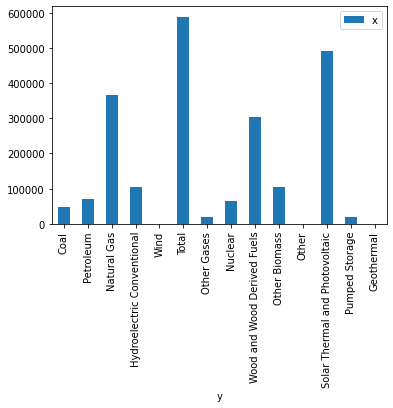

In [ ]:
producer_type = energia_df['GENERATION']
producer_type
type(producer_type)
TEPI = energia_df.loc[energia_df['GENERATION'] == 'Total Electric Power Industry']

# tranformar variables no numericas a numericas
le = preprocessing.LabelEncoder()
le.fit(producer_type)

list(le.classes_)

numeric_producer_type = le.transform(producer_type)
#np.sort(numeric_producer_type)

energy_sr = energia_df['ENERGY SOURCE'].unique()
energy_sr

count_producers = energia_df['ENERGY SOURCE'].value_counts()
num_producers = count_producers.values
#np.sort(num_producers)

df = pd.DataFrame({'x':producer_type[:14], 'y': energy_sr[:14]})
#df.sort_values(by=['x', 'y'])
df.plot('y','x', kind='bar')